In [44]:
# Data Manipulation
import numpy as np
import pandas as pd
import os
# Visualization/Image Processing
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
# Machine Learning
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, Flatten, MaxPool2D, Dense
from PIL import Image
# Other
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
tf.

In [2]:
#Path to train images
Train_path_axial = Path('./axial_t1wce_2_class/images/train')
Train_path_coronal = Path('./coronal_t1wce_2_class/images/train')
Train_path_sagittal = Path('./sagittal_t1wce_2_class/images/train')

#Path to test images
Test_path_axial = Path('./axial_t1wce_2_class/images/test')
Test_path_coronal = Path('./coronal_t1wce_2_class/images/test')
Test_path_sagittal = Path('./sagittal_t1wce_2_class/images/test')


In [3]:
df = pd.read_csv('./axial_t1wce_2_class/labels/train/00095_170.txt',sep = ' ',names=["MGMT", "x1", "x2", "x3", "x4"], header = None)
img = cv2.imread('./axial_t1wce_2_class/images/train/00095_170')

with open('./axial_t1wce_2_class/labels/train/00095_170.txt', encoding="utf-8") as f:
    for line in f:
        num = list(map(float,line.split(" "))) #  line.split("\t") if numbers are seperated by tab
        print(num)
        for i in num:
            i = i * 255
            bb.append(i)
        print(num)
print(bb)
np.delete(bb,0)

[0.0, 0.428991, 0.361502, 0.144366, 0.150235]


NameError: name 'bb' is not defined

In [3]:
def make_square(im, fill_color=(0, 0, 0, 0)):
    x, y = im.shape[0], im.shape[1]
    size = max(x, y)
    BLACK = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im,int((size-y)/2),int((size-y)/2),int((size-x)/2),int((size-x)/2),cv2.BORDER_CONSTANT, value = BLACK)
    return new_im

In [24]:
lab = ['axial_t1wce_2_class','coronal_t1wce_2_class', 'sagittal_t1wce_2_class']
X_train = []
bb = []
temp_array  = []
image_size = 180
for i in lab:
    folderPath = os.path.join('./',i,'images','train')
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        if img.shape[0] != img.shape[1]:
            img = make_square(img, fill_color=(0, 0, 0, 0))
        img = cv2.resize(img,(image_size, image_size))
        print(img.shape)
        X_train.append(img)
image_index = 0
bb_train = np.zeros((len(X_train),4))
for i in lab:
    labelsPath = os.path.join('./',i,'labels','train')
    for j in tqdm(os.listdir(labelsPath)):
        with open(os.path.join(labelsPath,j), encoding="utf-8") as f:
            for line in f:
                num = list(map(float,line.split(" ")))
                temp_array = []
                for k in num:
                    k = k * image_size
                    temp_array.append(k)
                temp_array.pop(0)
                #print(temp_array)
                bb_train[image_index] = np.array([temp_array])
                #print(bb_train[image_index])
            image_index += 1

X_test = []
for i in lab:
    folderPath = os.path.join('./',i,'images','test')
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        if img.shape[0] != img.shape[1]:
            img = make_square(img, fill_color=(0, 0, 0, 0))
        img = cv2.resize(img,(image_size, image_size))
        X_test.append(img)
image_index = 0
bb_test = np.zeros((len(X_test),4))
for i in lab:
    labelsPath = os.path.join('./',i,'labels','test')
    for j in tqdm(os.listdir(labelsPath)):
        with open(os.path.join(labelsPath,j), encoding="utf-8") as f:
            for line in f:
                num = list(map(float,line.split(" ")))
                temp_array = []
                for k in num:
                    k = k * image_size
                    temp_array.append(k)
                temp_array.pop(0)
                #print(temp_array)
                bb_test[image_index] = np.array([temp_array])
                #print(bb_test[image_index])
            image_index += 1

 50%|███████████████████████████████████████▊                                       | 149/296 [00:00<00:00, 718.82it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

100%|███████████████████████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 730.29it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 


 14%|███████████▌                                                                    | 46/318 [00:00<00:00, 454.03it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

 43%|█████████████████████████████████▊                                             | 136/318 [00:00<00:00, 420.97it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

 70%|███████████████████████████████████████████████████████▍                       | 223/318 [00:00<00:00, 413.22it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

100%|███████████████████████████████████████████████████████████████████████████████| 318/318 [00:00<00:00, 406.86it/s]


(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


  0%|                                                                                          | 0/264 [00:00<?, ?it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


 27%|█████████████████████▊                                                          | 72/264 [00:00<00:00, 354.21it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

 42%|█████████████████████████████████▏                                             | 111/264 [00:00<00:00, 367.18it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


 56%|████████████████████████████████████████████▎                                  | 148/264 [00:00<00:00, 356.89it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


 87%|████████████████████████████████████████████████████████████████████▊          | 230/264 [00:00<00:00, 383.45it/s]

(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 

100%|███████████████████████████████████████████████████████████████████████████████| 264/264 [00:00<00:00, 366.87it/s]


(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


100%|████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 4955.71it/s]


In [5]:
#to find the GPU
tf.test.is_built_with_cuda()

True

In [32]:
print(len(bb_train))

878


In [7]:
print(folderPath)

./sagittal_t1wce_2_class\images\test


In [6]:
len(X_train)

878

([], [])

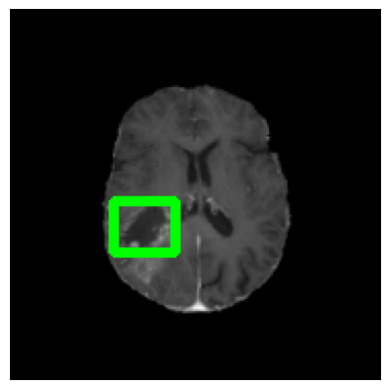

In [6]:
# Draw the bounding boxes
if len(bb_test[12]) == 4:
    xmin, ymin, height, width = bb_test[12]
    img = cv2.rectangle(X_test[12], (int(xmin-height/2), int(ymin-width/2)), (int(xmin+height/2), int(ymin+width/2)), (0, 255, 0), 3)

plt.imshow(img)
plt.xticks([])
plt.yticks([])

In [36]:
#prepare dataset 
train_dataset = ImageDataGenerator()
val_dataset = ImageDataGenerator()

In [28]:
#array conversion
X_train = np.array(X_train)
X_test = np.array(X_test)

In [29]:
X_train, bb_train = shuffle(X_train, bb_train)

In [ ]:
X_train, X_val, bb_train, bb_val = train_test_split(X_train, bb_train, test_size = 0.1, shuffle = False)

In [50]:
BATCH_SIZE = 16
save_path = os.path.join('./', 'model_checkpoints')
train_dataset = train_dataset.flow(X_train, bb_train, batch_size = BATCH_SIZE)
val_dataset = val_dataset.flow(X_val, bb_val, batch_size = BATCH_SIZE)

In [51]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
    filepath=save_path,
    monitor="val_loss",
    verbose=1,
    save_best_only=True)
]

In [59]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Flatten()(model)
model = tf.keras.layers.Dense(4,name='coords')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 180, 180, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, 180, 180, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 181, 181, 3)  0           normalization_4[0][0]            
____________________________________________________________________________________________

In [56]:
model.compile(
    loss={
        'coords': 'mse'
    },
    optimizer=tf.keras.optimizers.Adam(1e-3),
    metrics={
        'coords': 'accuracy'
    }
)

In [58]:
model.fit(
        train_dataset,
        epochs=20,
        validation_data = val_dataset,
        callbacks= callbacks_list)

Epoch 1/20
50/50 [==============================] - 122s 2s/step - loss: 83.9501 - accuracy: 0.9177 - val_loss: 209.0959 - val_accuracy: 0.9659

Epoch 00001: val_loss did not improve from 203.02637
Epoch 2/20
50/50 [==============================] - 110s 2s/step - loss: 48.1909 - accuracy: 0.9304 - val_loss: 236.3142 - val_accuracy: 0.9773

Epoch 00002: val_loss did not improve from 203.02637
Epoch 3/20
50/50 [==============================] - 109s 2s/step - loss: 36.5788 - accuracy: 0.9405 - val_loss: 158.3031 - val_accuracy: 0.9318

Epoch 00003: val_loss improved from 203.02637 to 158.30310, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 4/20
50/50 [==============================] - 123s 2s/step - loss: 32.2713 - accuracy: 0.9506 - val_loss: 117.6995 - val_accuracy: 0.9545

Epoch 00004: val_loss improved from 158.30310 to 117.69946, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 5/20
50/50 [==============================] - 121s 2s/step - loss: 27.2881 - accuracy: 0.9506 - val_loss: 78.3246 - val_accuracy: 0.9432

Epoch 00005: val_loss improved from 117.69946 to 78.32459, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 6/20
50/50 [==============================] - 139s 3s/step - loss: 23.4752 - accuracy: 0.9519 - val_loss: 76.4908 - val_accuracy: 0.9659

Epoch 00006: val_loss improved from 78.32459 to 76.49084, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 7/20
50/50 [==============================] - 149s 3s/step - loss: 24.2945 - accuracy: 0.9418 - val_loss: 57.5464 - val_accuracy: 0.9545

Epoch 00007: val_loss improved from 76.49084 to 57.54644, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 8/20
50/50 [==============================] - 131s 3s/step - loss: 23.6183 - accuracy: 0.9494 - val_loss: 76.2667 - val_accuracy: 0.9659

Epoch 00008: val_loss did not improve from 57.54644
Epoch 9/20
50/50 [==============================] - 110s 2s/step - loss: 20.7587 - accuracy: 0.9684 - val_loss: 66.6942 - val_accuracy: 0.9773

Epoch 00009: val_loss did not improve from 57.54644
Epoch 10/20
50/50 [==============================] - 107s 2s/step - loss: 19.0166 - accuracy: 0.9557 - val_loss: 52.0205 - val_accuracy: 0.9886

Epoch 00010: val_loss improved from 57.54644 to 52.02046, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 11/20
50/50 [==============================] - 112s 2s/step - loss: 18.8417 - accuracy: 0.9633 - val_loss: 61.3165 - val_accuracy: 0.9886

Epoch 00011: val_loss did not improve from 52.02046
Epoch 12/20
50/50 [==============================] - 111s 2s/step - loss: 17.2353 - accuracy: 0.9696 - val_loss: 48.8870 - val_accuracy: 0.9773

Epoch 00012: val_loss improved from 52.02046 to 48.88704, saving model to .\model_checkpoints


C:\Users\franc\anaconda3\envs\gpu2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .\model_checkpoints\assets
Epoch 13/20
50/50 [==============================] - 122s 2s/step - loss: 16.1069 - accuracy: 0.9671 - val_loss: 77.1535 - val_accuracy: 0.9886

Epoch 00013: val_loss did not improve from 48.88704
Epoch 14/20
50/50 [==============================] - 122s 2s/step - loss: 16.8928 - accuracy: 0.9734 - val_loss: 54.0064 - val_accuracy: 0.9886

Epoch 00014: val_loss did not improve from 48.88704
Epoch 15/20
50/50 [==============================] - 127s 3s/step - loss: 14.6313 - accuracy: 0.9772 - val_loss: 89.0460 - val_accuracy: 0.9886

Epoch 00015: val_loss did not improve from 48.88704
Epoch 16/20
50/50 [==============================] - 124s 2s/step - loss: 14.6163 - accuracy: 0.9747 - val_loss: 91.0142 - val_accuracy: 0.9659

Epoch 00016: val_loss did not improve from 48.88704
Epoch 17/20
50/50 [==============================] - 126s 3s/step - loss: 14.0179 - accuracy: 0.9620 - val_loss: 77.2598 - val_accuracy: 0.9773

Epoch